# FEDOT HACK TEAM - Кейс: Эффективные протоколы лечения коров

Участники:
* Стебеньков Андрей
* Сидоренко Денис
* Гетманов Андрей
* Пётр Шевченко
* Иванчик Елизавета

# Решение кейса

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import plotly.express as px

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_rows', 100)
plt.rcParams["figure.figsize"] = (12, 12)

In [ ]:
damp = pd.read_csv('damp.csv', encoding='cp1251', sep=';', index_col=False)

In [ ]:
damp['Дата события'] = pd.to_datetime(damp['Дата события'], format="%d.%m.%Y")
damp['Дата рождения'] = pd.to_datetime(damp['Дата рождения'], format="%d.%m.%Y")
damp['Текущий возраст'] = np.round((damp['Дата события'] - damp['Дата рождения'])
                                   / np.timedelta64(1, 'Y')).astype('int32')

damp

,Номер животного,Ушная бирка животного,Пол,Номер лактации,Результат отела,Легкость отела,Дата рождения,Дней в сухостое предыдущей лактации,Дней стельности при событии,Номер группы животного,Предыдущий номер группы животного,Событие,Дни доения при событии,Дата события,Примечание события,Текущий возраст
0,146,598621616,F,6,FA,1,2010-03-29,62,277,18,18,РАСЧКОП,336,2019-03-28,КАН,9
1,146,598621616,F,6,FA,1,2010-03-29,62,277,18,18,ВАКЦИН,349,2019-04-10,КОГЛАВАК,9
2,146,598621616,F,6,FA,1,2010-03-29,62,277,18,18,ВАКЦИН,349,2019-04-10,ЛЕПТО,9
3,291,530073354,F,6,MA,1,2009-07-30,68,0,23,23,ПЕРЕВОД,448,2019-04-08,F001T023,10
4,291,530073354,F,6,MA,1,2009-07-30,68,0,23,23,ПРОДАНА,458,2019-04-18,ПРОДАНА ; Прочее ; УВЗ8,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
592302,912269,912269,F,1,FA,1,2019-12-31,0,239,5,7,РАСЧКОП,274,2022-08-20,КАН,3
592303,912269,912269,F,1,FA,1,2019-12-31,0,239,5,7,ПЕРЕВОД,274,2022-08-20,F005T007,3
592304,912269,912269,F,1,FA,1,2019-12-31,0,239,7,7,СУХОСТ,279,2022-08-25,-,3
592305,912270,912270,F,1,MA,1,2019-12-31,0,273,17,17,ВАКЦИН,313,2022-08-23,СКОУ,3


In [ ]:
damp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 592307 entries, 0 to 592306
Data columns (total 16 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   Номер животного                      592307 non-null  int64         
 1   Ушная бирка животного                592307 non-null  object        
 2   Пол                                  592307 non-null  object        
 3   Номер лактации                       592307 non-null  int64         
 4   Результат отела                      331357 non-null  object        
 5   Легкость отела                       592307 non-null  int64         
 6   Дата рождения                        592307 non-null  datetime64[ns]
 7   Дней в сухостое предыдущей лактации  592307 non-null  int64         
 8   Дней стельности при событии          592307 non-null  int64         
 9   Номер группы животного               592307 non-null  int64         
 

## Подготовка датафрейма

In [ ]:
# ушная бирка не нужна
damp.drop('Ушная бирка животного', axis=1, inplace=True)

# быков убираем, телок с 0 лактацией убираем, пол убираем
damp = damp[~(damp['Пол'] == "M")]
damp = damp[~(damp['Номер лактации'] == 0)]
damp.drop("Пол", inplace=True, axis=1)

damp['Номер животного'].value_counts(ascending=False)

604122    185
512017    181
610033    171
606120    165
712071    163
         ... 
507026      1
505141      1
504139      1
504089      1
834         1
Name: Номер животного, Length: 6997, dtype: int64

In [ ]:
damp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 331420 entries, 0 to 592306
Data columns (total 14 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   Номер животного                      331420 non-null  int64         
 1   Номер лактации                       331420 non-null  int64         
 2   Результат отела                      331357 non-null  object        
 3   Легкость отела                       331420 non-null  int64         
 4   Дата рождения                        331420 non-null  datetime64[ns]
 5   Дней в сухостое предыдущей лактации  331420 non-null  int64         
 6   Дней стельности при событии          331420 non-null  int64         
 7   Номер группы животного               331420 non-null  int64         
 8   Предыдущий номер группы животного    331420 non-null  int64         
 9   Событие                              331420 non-null  object        
 

## Гипотеза. Есть линейная зависимость между событиями.

**Результат:** Гипотеза не подтвердилась, но не исключает нелинейных зависимостей

**Вывод:** Проверим зависимость через другие методы

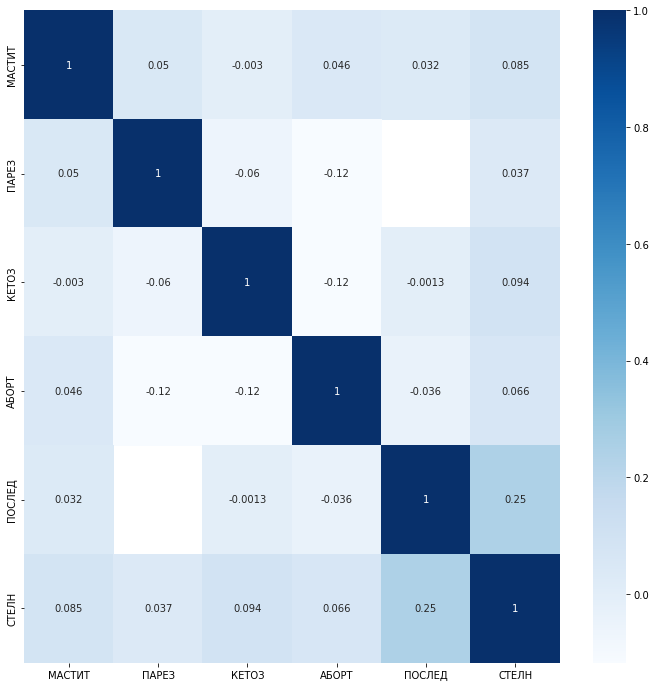

In [ ]:
events = [
 'МАСТИТ',
 'ПАРЕЗ',
 'КЕТОЗ',
 'АБОРТ',
 'ПОСЛЕД',
 'СТЕЛН']

cow_unique = pd.DataFrame([], columns=events)

for event in events:
    damp_tmp = damp[damp['Событие'] == event]
    damp_tmp['tmp'] = 1
    number_cows = damp_tmp.groupby(by='Номер животного')['tmp'].sum()
    cow_unique[event] = number_cows

# calculate the correlation matrix
corr = cow_unique.corr()
sb.heatmap(corr, cmap="Blues", annot=True)

## Гипотеза. Существуют вспышки заболеваний в течение года, возможно они имеют связь с проведенной вакцинацией

In [ ]:
events = [
 'МАСТИТ',
 'БОЛЕЗНЬ',
 'ПАРЕЗ',
 'МЕТРИТ',
 'КЕТОЗ']

ts_events = pd.DataFrame([], index = damp['Дата события'].unique(), columns=events)

for event in events:
    count_events = damp[damp['Событие']==event].groupby(by='Дата события').count()['Событие']
    ts_events[event] = count_events

px.bar(ts_events.groupby(pd.Grouper(freq='2W')).sum(),
      labels={'value': 'Количество событий',
              'index': 'Таймлайн, частота - 2 недели'},
      title = 'Заболеваемость (высота столба = сумма выявленных заболеваний за период)')

## Гипотеза. Заболевание Кетозом зависит от количества дней в сухостое

In [ ]:
data = damp[(damp['Событие']== 'КЕТОЗ') & (damp['Номер лактации'] != 1)]
px.histogram(data, x='Дней в сухостое предыдущей лактации', color='Текущий возраст',
            title='Рапределение заболевших КЕТОЗОМ особей по количеству дней в сухостое') \
.update_layout(
    yaxis_title='Количество заболевших КЕТОЗОМ'
)

## Заполнение таблицы статистика

In [ ]:
import re

years = list(range(2020, 2023))
months = list(range(1, 13))

advanced_index = ['Мастит случаев за период', 'Мастит голов за период', 'Передняя левая', 'Передняя правая', 'Задняя левая', 'Задняя правая']

target = ['МВ', 'КМ5', 'КМ7', 'КМ1', 'КМ6', 'КМ3', 'КМ8', 'КМ4', 'ТМ1', 'КМ2', 'ТМ5', 'СКМ2', 'ТМ2',
          'ТМ3', 'СКМ5', 'ТМ4', 'СКМ3', 'СКМ4', 'СКМ6', 'СКМ1', 'ТМ6', 'ТМ9']
heads_total = ['МВ_heads', 'КМ5_heads', 'КМ7_heads', 'КМ1_heads', 'КМ6_heads', 'КМ3_heads', 'КМ8_heads',
               'КМ4_heads', 'ТМ1_heads', 'КМ2_heads', 'ТМ5_heads', 'СКМ2_heads', 'ТМ2_heads',
               'ТМ3_heads', 'СКМ5_heads', 'ТМ4_heads', 'СКМ3_heads', 'СКМ4_heads', 'СКМ6_heads', 
               'СКМ1_heads', 'ТМ6_heads', 'ТМ9_heads']
heads_1_time = ['МВ_heads_1_time', 'КМ5_heads_1_time', 'КМ7_heads_1_time', 'КМ1_heads_1_time', 'КМ6_heads_1_time', 'КМ3_heads_1_time', 'КМ8_heads_1_time',
               'КМ4_heads_1_time', 'ТМ1_heads_1_time', 'КМ2_heads_1_time', 'ТМ5_heads_1_time', 'СКМ2_heads_1_time', 'ТМ2_heads_1_time',
               'ТМ3_heads_1_time', 'СКМ5_heads_1_time', 'ТМ4_heads_1_time', 'СКМ3_heads_1_time', 'СКМ4_heads_1_time', 'СКМ6_heads_1_time', 
               'СКМ1_heads_1_time', 'ТМ6_heads_1_time', 'ТМ9_heads_1_time']
heads_2_times = ['МВ_heads_2_times', 'КМ5_heads_2_times', 'КМ7_heads_2_times', 'КМ1_heads_2_times', 'КМ6_heads_2_times', 
                 'КМ3_heads_2_times', 'КМ8_heads_2_times', 'КМ4_heads_2_times', 'ТМ1_heads_2_times', 'КМ2_heads_2_times', 
                 'ТМ5_heads_2_times', 'СКМ2_heads_2_times', 'ТМ2_heads_2_times', 'ТМ3_heads_2_times', 'СКМ5_heads_2_times',
                 'ТМ4_heads_2_times', 'СКМ3_heads_2_times', 'СКМ4_heads_2_times', 'СКМ6_heads_2_times', 'СКМ1_heads_2_times',
                 'ТМ6_heads_2_times', 'ТМ9_heads_2_times']
heads_more_2_times = ['МВ_heads_more_2_times', 'КМ5_heads_more_2_times', 'КМ7_heads_more_2_times', 'КМ1_heads_more_2_times', 
                      'КМ6_heads_more_2_times', 'КМ3_heads_more_2_times', 'КМ8_heads_more_2_times', 'КМ4_heads_more_2_times',
                      'ТМ1_heads_more_2_times', 'КМ2_heads_more_2_times', 'ТМ5_heads_more_2_times', 'СКМ2_heads_more_2_times',
                      'ТМ2_heads_more_2_times', 'ТМ3_heads_more_2_times', 'СКМ5_heads_more_2_times', 'ТМ4_heads_more_2_times',
                      'СКМ3_heads_more_2_times', 'СКМ4_heads_more_2_times', 'СКМ6_heads_more_2_times', 'СКМ1_heads_more_2_times',
                      'ТМ6_heads_more_2_times', 'ТМ9_heads_more_2_times']
idx_names = advanced_index + target + heads_total + heads_1_time + heads_2_times + heads_more_2_times

print(idx_names)
col_names = ['Index']

for year in years:
        for month in months:
            col_names.append(str(month) + '.' + str(year))
            
output = pd.DataFrame([], columns=col_names)

output['Index'] = advanced_index + target + heads_total + heads_1_time + heads_2_times + heads_more_2_times
output.head(50)

In [ ]:
# Смотрим на кодировку части вымени в примечениях
unique_km1_descriptions = damp[damp['Примечание события'].str.startswith('КМ5')]['Примечание события'].unique()
unique_km1_descriptions

In [ ]:
# Формализуем интерпретацию примечания, проверяем
from functools import partial

def is_ill_part(part, description):
    prefix = description.split('_')[0]
    if prefix == 'МВ' or prefix not in target:
        return 0
    description = description[len(prefix) + 1:]  # remove prefix
    # Unify
    description = description.replace('?', '')
    if not description:
        return 0
    # description = description.replace('-', '')
    # description = description.replace('_', '')
    if len(description) == 2:
        if ',' in description:
            parts = description.replace(',', '')  # КМ6_,3
        else:
            # parts = map(str, range(int(description[0]), int(description[1]) + 1))
            parts = description
    elif ',' in description:
        parts = description.replace(',', '')
        # if len(parts) == 2:
        #     parts = map(str, range(int(parts[0]), int(parts[1]) + 1))
    elif '-' in description:
        parts = description.replace('-', '')
        # if len(parts) == 2:
        #     parts = map(str, range(int(parts[0]), int(parts[1]) + 1))
    elif '_' in description:
        parts = description.replace('_', '')
        # Этот разделитель влияет на категории 2 и 3!
        if len(parts) == 2:
            parts = map(str, range(int(parts[0]), int(parts[1]) + 1))
    else:
        parts = description
    return int(part in parts)

# 1 -> ['Передняя левая']
# 2 -> ['Передняя правая']
# 3 -> ['Задняя левая']
# 4 -> ['Задняя правая']

is_front_left_ill = partial(is_ill_part, '1')
is_front_right_ill = partial(is_ill_part, '2')
is_back_left_ill = partial(is_ill_part, '3')
is_back_right_ill = partial(is_ill_part, '4')

list(zip(unique_km1_descriptions, map(is_back_left_ill, unique_km1_descriptions)))

In [ ]:
# Применяем интерпретацию к датафрейму, конструируем новые признаки
damp['Передняя левая'] = damp['Примечание события'].map(is_front_left_ill)
damp['Передняя правая'] = damp['Примечание события'].map(is_front_right_ill)
damp['Задняя левая'] = damp['Примечание события'].map(is_back_left_ill)
damp['Задняя правая'] = damp['Примечание события'].map(is_back_right_ill)

In [ ]:
def get_value_from_df(month, year, reg):
    return damp[(damp['Дата события'].dt.month == month) & (damp['Дата события'].dt.year == year)]['Примечание события'].str.contains(fr"{reg}")

def get_sub_df(month, year):
    return damp[(damp['Дата события'].dt.month == month) & (damp['Дата события'].dt.year == year)]

def cases_n_times(df):
    length = []
    for number in sorted(df['Номер животного'].unique()):
        length.append(len(df[df['Номер животного'] == number]))
    num_1_time = len([el for el in length if el == 1]) # голов 1 раз
    num_2_times = len([el for el in length if el == 2]) # голов 2 раза
    num_more_2_times = len([el for el in length if el > 2]) # голов > 2 раз
    return num_1_time, num_2_times, num_more_2_times

for year in years:
    for month in months:
        cases = []
        heads_mastit = []
        num_heads_total = []
        num_1_total = []
        num_2_total = []
        num_more_2_total = []
        
        df_month = get_sub_df(month, year)
        front_left_sum = df_month['Передняя левая'].sum()
        front_right_sum = df_month['Передняя правая'].sum()
        back_left_sum = df_month['Задняя левая'].sum()
        back_right_sum = df_month['Задняя правая'].sum()

        for t in target:
            cases.append(get_value_from_df(month, year, fr"{t}").sum())
            num_heads_total.append(len(df_month[df_month['Примечание события'].str.contains(fr"{t}")].drop_duplicates('Номер животного'))) # голов всего 63
            num_1_time, num_2_times, num_more_2_times = cases_n_times(df_month[df_month['Примечание события'].str.contains(fr"{t}")])
            num_1_total.append(num_1_time)
            num_2_total.append(num_2_times)
            num_more_2_total.append(num_more_2_times)

        heads_mastit.append(df_month[df_month['Событие'] == 'МАСТИТ'].groupby(by='Номер животного')['Номер животного'].count().count())

        output[str(month) + '.' + str(year)] = [sum(cases)] + heads_mastit + [front_left_sum, front_right_sum, back_left_sum, back_right_sum] + cases + num_heads_total + num_1_total + num_2_total + num_more_2_total       
    #     break
    # break

output.head(200)

In [ ]:
output.to_excel('statistics_output.xlsx', encoding='cp1251')

## Байесовские сети

[Ссылка на ноутбук с расчетом Байесовских сетей (эту библиотеку не запустить в Colab)](https://niuitmo-my.sharepoint.com/:u:/g/personal/sidorenko_den95_niuitmo_ru/EVt-sTMMUrNGqt9DPFTuODMB9f-XEAErqp4dCCEStRTPuw?e=fI5kjh)

## Поиск наиболее эффективных протоколов

In [ ]:
# Подготовка данных, фильтр по событию МАСТИТ и ЗДОРОВА (при условии, что здорова 
#                                                        после мастита)
mastit = damp[(
    (damp['Событие']== 'МАСТИТ')|
    ((damp['Событие']== 'ЗДОРОВА')&(damp['Примечание события']=='МАСТИТ'))
    )]

# Отсеиваем мастит, которых лечился с помощью продоя
# MB in Russian
mastit = mastit[mastit['Примечание события']!='МВ']
# MB in English
mastit = mastit[mastit['Примечание события']!='MB']

# Датасет может содержать протоколы лечения [СКМ*_*, КМ*_*, TM*_*]
# КМ, ТМ - клинический и травматический мастит
# СКМ - субклинический мастит, обозначает улучшение состояния животного или легкую форму заболевания

# Во время предобработки данных исходим из того, что нам необходимо понять, является ли 
# успешным лечением протокол при переходе из одного события в другое
# Например, цепочка событий [КМ1_1, КМ1_2, СКМ1_2, КМ2_2, ЗДОРОВА] фактически означает
# набор успехов/неудач вида [успех, успех, неудача, успех]
# Такой подход свидетельствует о том, что мы можем упростить весь набор аббревиатур следующим образом:

mastit['Примечание события'] = mastit['Примечание события'].str.replace(r'.*КМ1.*', 'КМ1', regex=True)
mastit['Примечание события'] = mastit['Примечание события'].str.replace(r'.*КМ2.*', 'КМ2', regex=True)
mastit['Примечание события'] = mastit['Примечание события'].str.replace(r'.*КМ3.*', 'КМ3', regex=True)
mastit['Примечание события'] = mastit['Примечание события'].str.replace(r'.*КМ4.*', 'КМ4', regex=True)
mastit['Примечание события'] = mastit['Примечание события'].str.replace(r'.*КМ5.*', 'КМ5', regex=True)
mastit['Примечание события'] = mastit['Примечание события'].str.replace(r'.*КМ6.*', 'КМ6', regex=True)
mastit['Примечание события'] = mastit['Примечание события'].str.replace(r'.*КМ7.*', 'КМ7', regex=True)
mastit['Примечание события'] = mastit['Примечание события'].str.replace(r'.*КМ8.*', 'КМ8', regex=True)

mastit['Примечание события'] = mastit['Примечание события'].str.replace(r'.*ТМ1.*', 'КМ1', regex=True)
mastit['Примечание события'] = mastit['Примечание события'].str.replace(r'.*ТМ2.*', 'КМ2', regex=True)
mastit['Примечание события'] = mastit['Примечание события'].str.replace(r'.*ТМ3.*', 'КМ3', regex=True)
mastit['Примечание события'] = mastit['Примечание события'].str.replace(r'.*ТМ4.*', 'КМ4', regex=True)
mastit['Примечание события'] = mastit['Примечание события'].str.replace(r'.*ТМ5.*', 'КМ5', regex=True)
mastit['Примечание события'] = mastit['Примечание события'].str.replace(r'.*ТМ6.*', 'КМ6', regex=True)
mastit['Примечание события'] = mastit['Примечание события'].str.replace(r'.*ТМ9.*', 'ТМ9', regex=True)

mastit['Примечание события'] = mastit['Примечание события'].replace('МАСТИТ', 'well')

mastit['event'] = mastit['Примечание события'].apply(lambda x: [x])

df = mastit.groupby('Номер животного')['event'].sum()

# После упрощения и перезаписи всех исходов событий мы получим трансформированные цепочки событий
# Например, цепочка событий из первого примера [КМ1_1, КМ1_2, СКМ1_2, КМ2_2, ЗДОРОВА] 
# перейдет в состояние [КМ1, КМ1, КМ1, КМ2, ЗДОРОВА], чтобы неизменять результат 
# набора успехов/неудач и сохранить для этого случая его как [успех, успех, неудача, успех]
# составим алгоритм, который будет учитывать введённые закономерности:

success = pd.DataFrame(columns=mastit.columns)
fail = pd.DataFrame(columns=mastit.columns)

# рассматриваем каждую корову
for cow in df.index:

  # создаем временный датафрейм для конкретной коровы
    tmp = mastit[mastit['Номер животного'] == cow]
    tmp.index = [x for x in range(len(tmp))]

    # проходимся по всем событиям, которые были у коровы
    for i in range(len(tmp) - 1):

      # если корова выздоровела - эта строка нас не интересует
        if tmp['Примечание события'][i] == 'well':
            continue

      # но если следующий протокол соответствует рассматрвиаемому или следующий - выздоровление, то
      # сохраняем такое событие как успешное в отдельный датафрейм с упешно завершенными протоколами
        elif tmp['Примечание события'][i] == tmp['Примечание события'][i + 1] or \
        tmp['Примечание события'][i + 1] == 'well':
            success = success.append(tmp.loc[i])

      # если следующий протокол не соответствует данному и не является "ЗДОРОВА", то
      # сохраняем такое событие как неудачное
        else:
            fail = fail.append(tmp.loc[i])

# Можем сохранить данные в CSV формате
# ===============================
# success.to_csv('success.csv')
# fail.to_csv('fail.csv')
# ===============================

# В итоге мы получили 2 датафрейма с успешными и неуспешными событиями, 
# посчитаем статистики для каждого датафрейма и найдем вероятности успеха применения каждого протокола по стаду

probability = pd.DataFrame(success['Примечание события'].value_counts())
probability['success'] = probability['Примечание события']
probability['fail'] = fail['Примечание события'].value_counts()
probability['prob_success'] = np.round(probability['success']/(probability['fail']+probability['success']), 2)
probability.drop('Примечание события', axis=1, inplace=True)
probability = probability.sort_values('prob_success', ascending = False)

display(probability)

,success,fail,prob_success
ТМ9,237,69,0.77
КМ3,896,365,0.71
КМ1,1111,668,0.62
КМ2,351,212,0.62
КМ5,642,454,0.59
КМ6,301,207,0.59
КМ4,381,334,0.53
КМ7,11,24,0.31
КМ8,4,16,0.20


## Поиск особей, резистентных к конкретному протоколу лечения

In [ ]:
# воспользуемся ранее полученным датафреймом с неуспешными событиями,
# составим данные вида Номер_животного -> [список неудачных протоколов]
df_fail = fail.groupby('Номер животного')['event'].sum()
df_fail = pd.DataFrame(df_fail)
df_fail['len'] = df_fail['event'].apply(lambda x: len(x))

# отбросим особей, у которых менее 3 неудачных событий 
df_fail = df_fail[df_fail['len'] > 3]
df_fail['cow'] = df_fail.index

# условимся, что резистентность к лекарствам того или иного протокола лечения - это 
# случай, когда корова не вылечилась от мастита одним и тем же протоколом более 3 раз
df_fail['resistance'] = df_fail['event'].apply(lambda x: set([res for res in x if x.count(res) >= 3]))
df_fail['resistance'] = df_fail['resistance'].apply(lambda x: None if len(x)==0 else x)
df_fail.dropna(axis=0, inplace=True)

# на данном шаге около 200 коров являются резистентными к одному или нескольким протоколам, однако
# некоторые из них уже были проданы или умерли,
# найдем живых особей и отразим их возраст на момент последнего события в истории записей
alive_cows = []
age_alive_cows = []
for cow in df_fail['resistance'].index:
    tmp = damp[damp['Номер животного']==cow]
    tmp['event'] = tmp['Событие'].apply(lambda x: [str(x)])
    tmp = tmp.groupby(by='Номер животного')['event'].sum()
    
    if 'ПРОДАНА' in tmp.values[0] or "ПАЛА" in tmp.values[0]:
        continue
    else:
        alive_cows.append(cow)
        tmp = damp[damp['Номер животного']==cow]
        age = tmp['Текущий возраст'].iloc[-1]
        age_alive_cows.append(age)
        
resistance = df_fail.loc[alive_cows]
resistance['age'] = age_alive_cows
resistance.drop(['event', 'len', 'cow'], axis=1, inplace=True)

# Только 2 живущих ныне животных обрели резистентность к лекарствам указанных протоколов лечений.
# Это говорит о том, что никакой зависимости между эффективностью протоколов и индивидуальными
# особенностями животных не существует. 
display(resistance)

,resistance,age
Номер животного,,
512017,{ТМ9},7
711136,{КМ1},5


## Собрание датасета для генеологического графа

In [ ]:
ancestors = pd.read_csv('Предки.CSV', sep=';', encoding='cp1251')

ancestors = ancestors.drop(25498)
ancestors['Номер животного'] = ancestors['Номер животного'].astype('int64')
ancestors['Номер Матери'] = ancestors['Номер Матери'].astype('int64')

ancestors

In [ ]:
family_df = pd.DataFrame([])

family_df['Номер животного'] = damp['Номер животного'].unique()

mother, father, sex, mastit = [], [], [], []
for cow in family_df['Номер животного']:
  mother.append(ancestors[ancestors['Номер животного'] == cow]['Номер Матери'].values[0])
  father.append(ancestors[ancestors['Номер животного'] == cow]['Код Отца'].values[0])
  sex.append(damp[damp['Номер животного'] == cow]['Пол'].values[0])
  
  if damp[(damp['Номер животного'] == cow) & (damp['Событие'] == 'МАСТИТ')]['Пол'].values.size != 0:  
    mastit.append(True)
  else:
    mastit.append(False)

family_df['Пол'] = sex
family_df['Однажды болел маститом'] = mastit
family_df['Номер матери'] = mother
family_df['Код отца'] = father

family_df

In [ ]:
family_df = family_df[family_df['Номер матери'] != 0]
ancestors = ancestors[ancestors['Номер матери'] != 0]

## Построение графа

In [ ]:
import networkx as nx
G = nx.DiGraph()
G.add_node(mother, sex='F')

for n in family_df['Номер матери'].unique():
  G.add_node(n, sex='F')

for _, cow in family_df.iterrows():
  if cow['Пол'] == 'F':
    G.add_node(cow['Номер животного'], sex=cow['Пол'], mastit=cow['Однажды болел маститом'])
    G.add_edge(cow['Номер матери'], cow['Номер животного'])

In [ ]:
nx.write_gexf(G, 'female_cow_graph.gexf')